# Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

In [1]:
# Importing necessary libraries.
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy import stats
warnings.filterwarnings("ignore")

In [2]:
# Defining data folder path as per my folder structure.
data_folder_path = os.path.join(os.getcwd(), "..", "Data")

# Dataset filenames.
customer_behavior_data = "QVI_purchase_behaviour.csv"
transaction_data = "QVI_transaction_data.xlsx"

# Creating dataframes.
cst_df = pd.read_csv(os.path.join(data_folder_path, customer_behavior_data))
trx_df = pd.read_excel(os.path.join(data_folder_path, transaction_data), engine="openpyxl")

## Exploring Customer Behavior Data

In [3]:
cst_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
print("Dataset rows:", cst_df.shape[0])
print("Dataset columns:", cst_df.shape[1])

Dataset rows: 72637
Dataset columns: 3


In [5]:
print("Number of unique LYLTY_CARD_NBR values:", cst_df["LYLTY_CARD_NBR"].nunique())

Number of unique LYLTY_CARD_NBR values: 72637


The number of unique values in this column is equal to number of rows in dataset, hence this column has all distinct values (no duplicates), Good for us!

In [6]:
# Checking unique values and their counts in LIFESTAGE column.
lifestage_distribution = cst_df["LIFESTAGE"].value_counts().to_frame().reset_index()

# Converting the value counts into percentage to get a wider view of distribution.
lifestage_distribution["pct"] = round((lifestage_distribution["count"]/lifestage_distribution["count"].sum())*100, 1)
lifestage_distribution

,LIFESTAGE,count,pct
0,RETIREES,14805,20.4
1,OLDER SINGLES/COUPLES,14609,20.1
2,YOUNG SINGLES/COUPLES,14441,19.9
3,OLDER FAMILIES,9780,13.5
4,YOUNG FAMILIES,9178,12.6
5,MIDAGE SINGLES/COUPLES,7275,10.0
6,NEW FAMILIES,2549,3.5


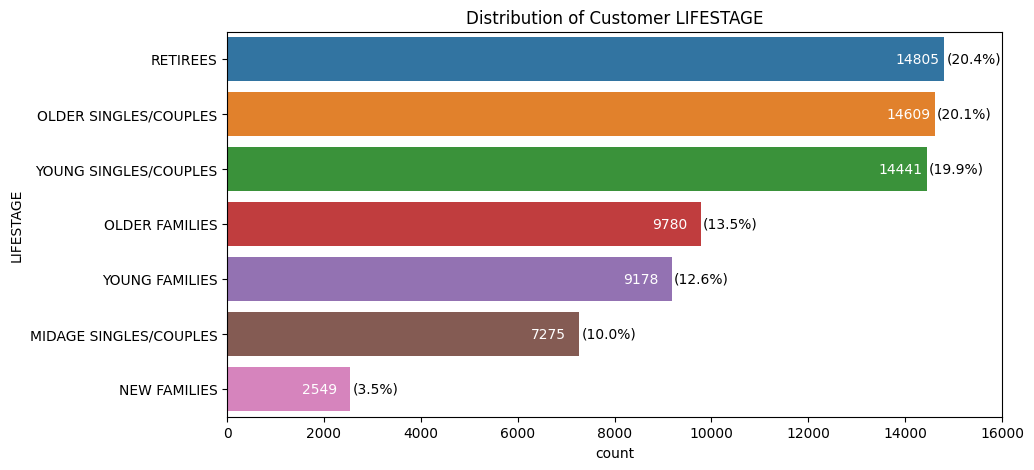

In [7]:
# Plotting the distribution.
plt.figure(figsize=(10,5))
bar = sns.barplot(y="LIFESTAGE", x="count", data=lifestage_distribution)

# Annotating to make the plot intuitive.
for i in range(len(lifestage_distribution)):
    bar.text(lifestage_distribution["count"][i]-1000, i, str(lifestage_distribution["count"][i]),
             fontdict=dict(color="white", fontsize=10, verticalalignment="center"))
    bar.text(lifestage_distribution["count"][i]+50, i, "({}%)".format(lifestage_distribution["pct"][i]),
             fontdict=dict(color="black", fontsize=10, verticalalignment="center"))

#plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.title("Distribution of Customer LIFESTAGE")
plt.xlim(0, 16000)
plt.show()

In [8]:
# Now, checking unique values in PREMIUM_CUSTOMER column.
premium_cst_distribution = cst_df["PREMIUM_CUSTOMER"].value_counts().to_frame().reset_index()
premium_cst_distribution

,PREMIUM_CUSTOMER,count
0,Mainstream,29245
1,Budget,24470
2,Premium,18922


Looks like this column has customer types other than premium as well, so the column name PREMIUM_CUSTOMER feels misleading. Will change it then.

In [9]:
# Changing column name to make it sound more intuitive.
cst_df = cst_df.rename(columns={"PREMIUM_CUSTOMER": "CUSTOMER_TYPE"})
cst_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,CUSTOMER_TYPE
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [10]:
# Checking the value counts in CUSTOMER_TYPE column.
premium_cst_distribution = premium_cst_distribution.rename(columns={"PREMIUM_CUSTOMER": "CUSTOMER_TYPE"})
premium_cst_distribution

,CUSTOMER_TYPE,count
0,Mainstream,29245
1,Budget,24470
2,Premium,18922


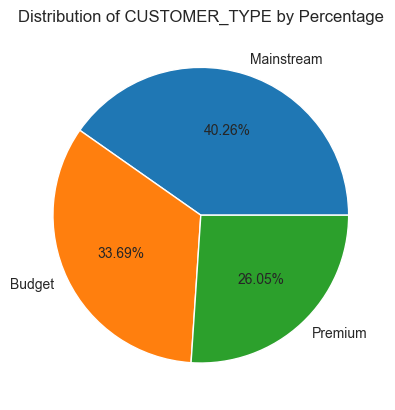

In [11]:
# Pie chart, to get an idea of percentage distribution of CUSTOMER_TYPE.
sns.set_style("whitegrid")
plt.pie(premium_cst_distribution["count"], labels=premium_cst_distribution["CUSTOMER_TYPE"], autopct='%.2f%%')
plt.title("Distribution of CUSTOMER_TYPE by Percentage")
plt.show()

### Missing values check

In [12]:
cst_df.isnull().sum()

LYLTY_CARD_NBR    0
LIFESTAGE         0
CUSTOMER_TYPE     0
dtype: int64

The dataset has no missing values. Good for us!   
Good to move ahead with the next dataset exploration.

## Exploring Transaction Data

In [13]:
trx_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
print("Dataset rows:", trx_df.shape[0])
print("Dataset columns:", trx_df.shape[1])

Dataset rows: 264836
Dataset columns: 8


In [15]:
# Checking the data types.
trx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


This tells us that there are no missing values. But the DATE column appears to be in integer type. Searching online confirms that Excel stores dates as integers and these integer dates begin on 01
Jan 1900 (considered as integer 1), so we'll convert the DATE column to the correct datatype.

In [16]:
# Converting DATE column to datetime.
# The origin param is "1899-12-30" because Excel mistakenly assumes 1900 was a leap year, so we adjust for it using December 30, 1899.
trx_df["DATE"] = pd.to_datetime(trx_df["DATE"], unit="D", origin="1899-12-30")
trx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [17]:
trx_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now, lets first analyze the only object column that we have (PROD_NAME), as it tells us about the product.

In [18]:
trx_df["PROD_NAME"].nunique()

114

So there are 114 unique values. This means there are a many many products that are getting repeated. Looks like we need to check these unique products to see if we find anything interesting.

In [19]:
trx_df["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Amazing! This column looks like a gold mine of product information. What I could understand as per my observation is that:   
1) There's probably a brand name in the beginning. Eg.: Natural, Smiths, CCs, Twisties, Doritos, etc.
2) Looks like every name also has size, like 175g, 150g, etc. But again, inconsistently somewhere it is "G" instead of "g".
3) Lots of different flavours, like sour cream, chicken, Tangy, etc.
4) As per our client, we wanna focus on chips. But what I see is, the chips can also be written as "chp" or "chps" and there are some instances where the word "chip" or "chips" or any such form is not written, but we should infer that it is still a chip product. Eg.: "Red Rock Deli Sp Salt & Truffle 150G", "Tyrrells Crisps Lightly Salted 165g", "Infuzions Thai SweetChili PotatoMix 110g", etc.
5) However, I see there're a lot of separate salsa products in there, that we definitely are not concerned with, so we'll try to remove those as we write the code. Eg.: "Woolworths Mild Salsa 300g", "Doritos Salsa Medium 300g", etc.

Based on these observation, we shall take the following course of actions to refine the data and segregate this gold mine so it's easier to comprehend and analyze.   
1) Separate brand names. Although some brand names are 2 words, we'll take first word as brand name for convenience.
2) Extract and separate the sizes.
3) Remove Salsa products, as we want to analyze for chip products.

### Feature Engineering

### 1) Brand Name
As per our assumption, we'll consider first word of the Name as the Brand name.

In [20]:
trx_df["PROD_BRAND"] = trx_df["PROD_NAME"].apply(lambda x: x.split()[0])
trx_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


One thing I noticed later is the repeating Brand names. For example, there's a brand "RRD" that is short for "Red Rock Deli". But our logic converted the "Red Rock Deli" Brand name to "Red". And similar is the case with the following Brands:   
1) Smiths = Smith
2) Doritos = Dorito
3) Infuzions = Infzns
4) WW = Woolworths
5) Grain = GrnWves
6) Natural = NCC
 
So let's convert all these repeating brands to their appropriate names so that we have uniformity in the data.

In [21]:
print("Number of rows with brand 'Red':", len(trx_df[trx_df["PROD_BRAND"] == "Red"]))
print("Number of rows with brand 'RRD':", len(trx_df[trx_df["PROD_BRAND"] == "RRD"]))

print("\nNumber of rows with brand 'Smiths':", len(trx_df[trx_df["PROD_BRAND"] == "Smiths"]))
print("Number of rows with brand 'Smith':", len(trx_df[trx_df["PROD_BRAND"] == "Smith"]))

print("\nNumber of rows with brand 'Doritos':", len(trx_df[trx_df["PROD_BRAND"] == "Doritos"]))
print("Number of rows with brand 'Dorito':", len(trx_df[trx_df["PROD_BRAND"] == "Dorito"]))

print("\nNumber of rows with brand 'Infuzions':", len(trx_df[trx_df["PROD_BRAND"] == "Infuzions"]))
print("Number of rows with brand 'Infzns':", len(trx_df[trx_df["PROD_BRAND"] == "Infzns"]))

print("\nNumber of rows with brand 'WW':", len(trx_df[trx_df["PROD_BRAND"] == "WW"]))
print("Number of rows with brand 'Woolworths':", len(trx_df[trx_df["PROD_BRAND"] == "Woolworths"]))

print("\nNumber of rows with brand 'Grain':", len(trx_df[trx_df["PROD_BRAND"] == "Grain"]))
print("Number of rows with brand 'GrnWves':", len(trx_df[trx_df["PROD_BRAND"] == "GrnWves"]))

print("\nNumber of rows with brand 'Natural':", len(trx_df[trx_df["PROD_BRAND"] == "Natural"]))
print("Number of rows with brand 'NCC':", len(trx_df[trx_df["PROD_BRAND"] == "NCC"]))

print("\nNumber of rows with brand 'Snbts':", len(trx_df[trx_df["PROD_BRAND"] == "Snbts"]))
print("Number of rows with brand 'Sunbites':", len(trx_df[trx_df["PROD_BRAND"] == "Sunbites"]))

Number of rows with brand 'Red': 5885
Number of rows with brand 'RRD': 11894

Number of rows with brand 'Smiths': 28860
Number of rows with brand 'Smith': 2963

Number of rows with brand 'Doritos': 24962
Number of rows with brand 'Dorito': 3185

Number of rows with brand 'Infuzions': 11057
Number of rows with brand 'Infzns': 3144

Number of rows with brand 'WW': 10320
Number of rows with brand 'Woolworths': 4437

Number of rows with brand 'Grain': 6272
Number of rows with brand 'GrnWves': 1468

Number of rows with brand 'Natural': 6050
Number of rows with brand 'NCC': 1419

Number of rows with brand 'Snbts': 1576
Number of rows with brand 'Sunbites': 1432


In [22]:
trx_df["PROD_BRAND"] = trx_df["PROD_BRAND"].replace("Red", "RRD")
trx_df["PROD_BRAND"] = trx_df["PROD_BRAND"].replace("Smith", "Smiths")
trx_df["PROD_BRAND"] = trx_df["PROD_BRAND"].replace("Dorito", "Doritos")
trx_df["PROD_BRAND"] = trx_df["PROD_BRAND"].replace("Infzns", "Infuzions")
trx_df["PROD_BRAND"] = trx_df["PROD_BRAND"].replace("Woolworths", "WW")
trx_df["PROD_BRAND"] = trx_df["PROD_BRAND"].replace("Grain", "GrnWves")
trx_df["PROD_BRAND"] = trx_df["PROD_BRAND"].replace("Natural", "NCC")
trx_df["PROD_BRAND"] = trx_df["PROD_BRAND"].replace("Snbts", "Sunbites")

In [23]:
print("Number of rows with brand 'Red':", len(trx_df[trx_df["PROD_BRAND"] == "Red"]))
print("Number of rows with brand 'RRD':", len(trx_df[trx_df["PROD_BRAND"] == "RRD"]))

print("\nNumber of rows with brand 'Smiths':", len(trx_df[trx_df["PROD_BRAND"] == "Smiths"]))
print("Number of rows with brand 'Smith':", len(trx_df[trx_df["PROD_BRAND"] == "Smith"]))

print("\nNumber of rows with brand 'Doritos':", len(trx_df[trx_df["PROD_BRAND"] == "Doritos"]))
print("Number of rows with brand 'Dorito':", len(trx_df[trx_df["PROD_BRAND"] == "Dorito"]))

print("\nNumber of rows with brand 'Infuzions':", len(trx_df[trx_df["PROD_BRAND"] == "Infuzions"]))
print("Number of rows with brand 'Infzns':", len(trx_df[trx_df["PROD_BRAND"] == "Infzns"]))

print("\nNumber of rows with brand 'WW':", len(trx_df[trx_df["PROD_BRAND"] == "WW"]))
print("Number of rows with brand 'Woolworths':", len(trx_df[trx_df["PROD_BRAND"] == "Woolworths"]))

print("\nNumber of rows with brand 'Grain':", len(trx_df[trx_df["PROD_BRAND"] == "Grain"]))
print("Number of rows with brand 'GrnWves':", len(trx_df[trx_df["PROD_BRAND"] == "GrnWves"]))

print("\nNumber of rows with brand 'Natural':", len(trx_df[trx_df["PROD_BRAND"] == "Natural"]))
print("Number of rows with brand 'NCC':", len(trx_df[trx_df["PROD_BRAND"] == "NCC"]))

print("\nNumber of rows with brand 'Snbts':", len(trx_df[trx_df["PROD_BRAND"] == "Snbts"]))
print("Number of rows with brand 'Sunbites':", len(trx_df[trx_df["PROD_BRAND"] == "Sunbites"]))

Number of rows with brand 'Red': 0
Number of rows with brand 'RRD': 17779

Number of rows with brand 'Smiths': 31823
Number of rows with brand 'Smith': 0

Number of rows with brand 'Doritos': 28147
Number of rows with brand 'Dorito': 0

Number of rows with brand 'Infuzions': 14201
Number of rows with brand 'Infzns': 0

Number of rows with brand 'WW': 14757
Number of rows with brand 'Woolworths': 0

Number of rows with brand 'Grain': 0
Number of rows with brand 'GrnWves': 7740

Number of rows with brand 'Natural': 0
Number of rows with brand 'NCC': 7469

Number of rows with brand 'Snbts': 0
Number of rows with brand 'Sunbites': 3008


Perfect! Now the brand names are consistent.

In [24]:
brand_df = trx_df["PROD_BRAND"].value_counts().to_frame().reset_index()
brand_df

,PROD_BRAND,count
0,Kettle,41288
1,Smiths,31823
2,Doritos,28147
3,Pringles,25102
4,RRD,17779
5,WW,14757
6,Infuzions,14201
7,Thins,14075
8,Cobs,9693
9,Tostitos,9471


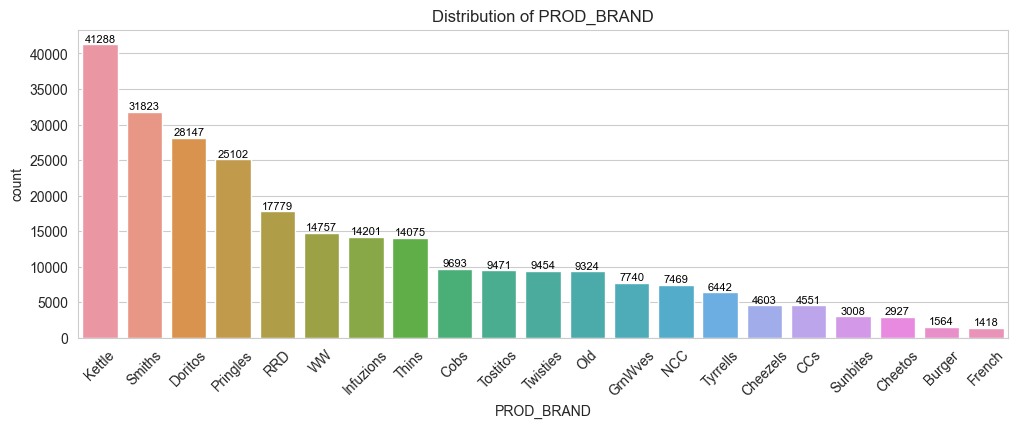

In [25]:
plt.figure(figsize=(12, 4))
bar = sns.barplot(x="PROD_BRAND", y="count", data=brand_df)

for i in range(len(brand_df)):
    bar.text(i, brand_df["count"][i]+300, str(brand_df["count"][i]),
             fontdict=dict(color="black", fontsize=8, horizontalalignment="center"))

plt.title("Distribution of PROD_BRAND")
plt.xticks(rotation = 45)
plt.show()

We see that "Kettle" brand was the most sold product. Note that this contains Chip as well as Salsa.

### 2) Sizes
This seemed easier at first, as I considered taking the last entity in the name as size, but in some instances, the size is attached to the name, and in some cases the size appears towards the center of the name. And the size is variable between 2 digit and 3 digit values, so we cannot take the string slice. Hence, looks like we should take regex to identify numbers in string.

In [26]:
trx_df["PROD_SIZE"] = trx_df["PROD_NAME"].apply(lambda x: re.findall("\d+", x)[0])
trx_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [27]:
prod_size_df = trx_df["PROD_SIZE"].value_counts().to_frame().reset_index()
prod_size_df

,PROD_SIZE,count
0,175,66390
1,150,43131
2,134,25102
3,110,22387
4,170,19983
5,165,15297
6,300,15166
7,330,12540
8,380,6418
9,270,6285


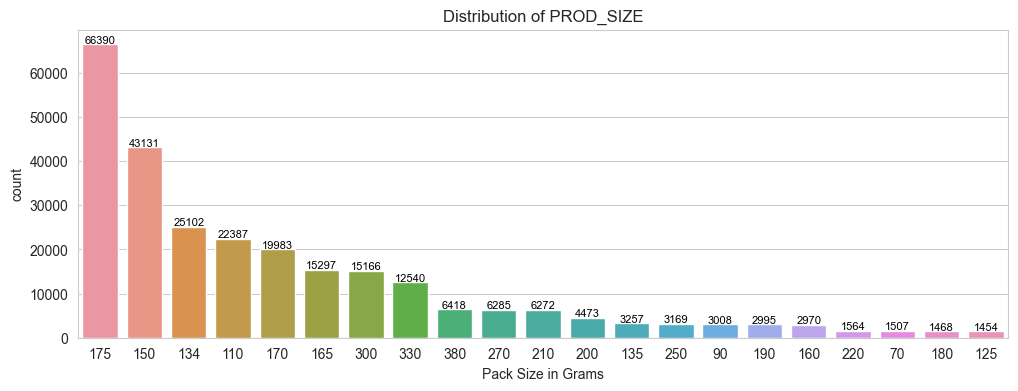

In [28]:
plt.figure(figsize=(12, 4))
bar = sns.barplot(x="PROD_SIZE", y="count", data=prod_size_df)

for i in range(len(prod_size_df)):
    bar.text(i, prod_size_df["count"][i]+300, str(prod_size_df["count"][i]),
             fontdict=dict(color="black", fontsize=8, horizontalalignment="center"))

plt.title("Distribution of PROD_SIZE")
plt.xlabel("Pack Size in Grams")
plt.show()

Awesome! we see that 175g pack size is the most popular across all products. Note that this contain Chip as well as Salsa.

### 3) Removing Salsa Products

In [29]:
# Checking if there's "Salsa" and "salsa" in PROD_NAME.
print("Number of products with 'salsa':", len(trx_df[trx_df["PROD_NAME"].str.contains("salsa")]))
print("Number of products with 'Salsa':", len(trx_df[trx_df["PROD_NAME"].str.contains("Salsa")]))

Number of products with 'salsa': 0
Number of products with 'Salsa': 18094


So there's only "Salsa" with capital "S", we'll remove them.

In [30]:
trx_df = trx_df[~trx_df["PROD_NAME"].str.contains("Salsa")]
print("Number of rows after 'Salsa' removal:", trx_df.shape[0])

Number of rows after 'Salsa' removal: 246742


In [31]:
trx_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


Excellent!! Now that we have extracted some good info out of PROD_NAME column, let's get rid of redundant information from the PROD_NAME column. We'll remove the size info from this column.

### 4) Cleaning PROD_NAME

To remove the size from PROD_NAME, we shall simply replace it by "". But we shall do this for size values with "g" as well as "G".

In [32]:
# Printing values for reference.
print("Number of rows with digits:", sum(trx_df["PROD_NAME"].str.contains("\d+")))
print("Number of rows with digits with 'g':", sum(trx_df["PROD_NAME"].str.contains("\d+g")))
print("Number of rows with digits with 'G':", sum(trx_df["PROD_NAME"].str.contains("\d+G")))

Number of rows with digits: 246742
Number of rows with digits with 'g': 240678
Number of rows with digits with 'G': 6064


In [33]:
# Replacing the size info in PROD_NAME column.
trx_df["PROD_NAME"] = trx_df["PROD_NAME"].replace("\d+g", "", regex=True)
trx_df["PROD_NAME"] = trx_df["PROD_NAME"].replace("\d+G", "", regex=True)

In [34]:
# Printing values after the change to verify correctness.
print("Number of rows with digits:", sum(trx_df["PROD_NAME"].str.contains("\d+")))
print("Number of rows with digits with 'g':", sum(trx_df["PROD_NAME"].str.contains("\d+g")))
print("Number of rows with digits with 'G':", sum(trx_df["PROD_NAME"].str.contains("\d+G")))

Number of rows with digits: 0
Number of rows with digits with 'g': 0
Number of rows with digits with 'G': 0


In [35]:
trx_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,NCC,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,Kettle,150


Awesome!!!

Now that we have processed the object columns, let's look at other numeric columns to check if we find anything.

In [36]:
trx_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


The PROD_QTY column appears to have outliers, as the median and 75th percentile value is 2, and max is 200. Big difference! Similar case with TOT_SALES column. Let's investigate this to see what's the issue here.

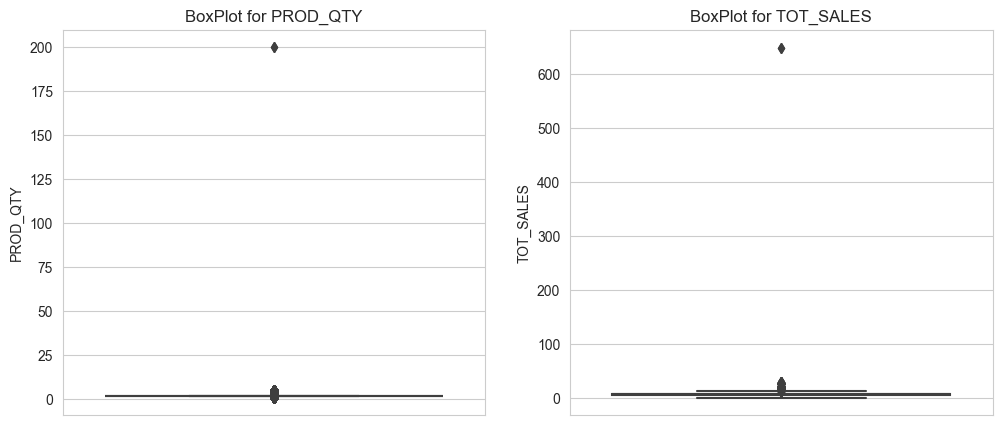

In [37]:
# Creating Boxplots to identify outliers.
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(y="PROD_QTY", data=trx_df, ax=axes[0])
axes[0].set_title("BoxPlot for PROD_QTY")

sns.boxplot(y="TOT_SALES", data=trx_df, ax=axes[1])
axes[1].set_title("BoxPlot for TOT_SALES")

plt.show()

Clearly, these columns have extreme outliers. For PROD_QTY the outlier value seems to be 200, and for TOT_SALES, it is 650. Let's further investigate this.

In [38]:
trx_df[(trx_df["PROD_QTY"] == 200) | (trx_df["TOT_SALES"] == 650)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,Doritos,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,Doritos,380


Turns out, outliers in these columns appear in the same rows. We shall remove these 2 rows.

In [39]:
trx_df = trx_df[~((trx_df["PROD_QTY"] == 200) | (trx_df["TOT_SALES"] == 650))]
print("Number of rows after outlier removal:", trx_df.shape[0])

Number of rows after outlier removal: 246740


In [40]:
# Verifying.
trx_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


That looks reasonable now. Let's move ahead! Now that the data is cleaned and processed, lets sort it as per date column.

In [41]:
trx_df = trx_df.sort_values(by="DATE").reset_index(drop=True)
trx_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,PROD_SIZE
0,2018-07-01,88,88140,86914,25,Pringles SourCream Onion,2,7.4,Pringles,134
1,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig,2,9.2,Kettle,150
2,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix,2,7.6,Infuzions,110
3,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt,1,3.0,RRD,165
4,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme,2,11.4,Doritos,330
5,2018-07-01,217,217068,216604,46,Kettle Original,2,10.8,Kettle,175
6,2018-07-01,164,164250,165331,31,Infzns Crn Crnchers Tangy Gcamole,2,7.6,Infuzions,110
7,2018-07-01,67,67165,64797,111,Smiths Chip Thinly Cut Original,2,6.0,Smiths,175
8,2018-07-01,257,257190,256903,68,Pringles Chicken Salt Crips,2,7.4,Pringles,134
9,2018-07-01,216,216220,215610,60,Kettle Tortilla ChpsFeta&Garlic,2,9.2,Kettle,150


From the Descriptive statistics, we know that data starts from 1st July 2018, and ends at 30th June 2019. So it's a 1 year data. So ideally, we should have data for all 365 days. Let's check if that's the case.

In [42]:
print("Data available for number of days:", trx_df.groupby("DATE").size().count())

Data available for number of days: 364


Allright, so data for 1 day out of the 365 days does not exist in the dataset. That's a discontinous date column then. Let's see if we can find what this date is.

In [43]:
# I'll use the .difference function to check if there's a difference between our date column and the actual date range from 1st July 2018 to 30th June 2019.
pd.date_range(start="2018-07-01", end="2019-06-30").difference(trx_df["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

Makes sense, this is a chritmas date, and maybe there were no sales on that day due to holiday and stores being closed. So we'll go ahead and fill in 0 and dummy values for this date to create continous date values in DATE column. 

In [44]:
trx_df.columns.tolist()

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES',
 'PROD_BRAND',
 'PROD_SIZE']

In [45]:
# Appending the information for 2018-12-25.
christmas_df = pd.DataFrame({"DATE": [pd.to_datetime("2018-12-25")],
                             "STORE_NBR": [0],
                             "LYLTY_CARD_NBR": [0],
                             "TXN_ID": [0],
                             "PROD_NBR": [0],
                             "PROD_NAME": [None],
                             "PROD_QTY": [0],
                             "TOT_SALES": [0],
                             "PROD_BRAND": [None],
                             "PROD_SIZE": [0]})

trx_df = pd.concat([trx_df, christmas_df])
trx_df = trx_df.sort_values(by="DATE").reset_index(drop=True)

In [46]:
trx_df[trx_df["DATE"] == "2018-12-25"]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,PROD_SIZE
120465,2018-12-25,0,0,0,0,None,0,0.0,None,0


In [47]:
print("Final row count for transaction data:", trx_df.shape[0])

Final row count for transaction data: 246741


Perfect! Now that our datasets are processed and sorted properly, we can combine them together.

## Combining Datasets

In [48]:
print("Unique IDs in customer data:", cst_df["LYLTY_CARD_NBR"].nunique())
print("Unique IDs in transaction data:", trx_df["LYLTY_CARD_NBR"].nunique())

Unique IDs in customer data: 72637
Unique IDs in transaction data: 71288


We see that there are more IDs in customer data than in transaction data. This means there are some customers who never made a transaction. Hence, we can consider a left join with transaction on left. Note that I did not consider inner join here because of the "christmas" day situation. If we take inner, that row will be lost. Hence, we'll go ahead with left. 

In [49]:
main_df = pd.merge(trx_df, cst_df, on="LYLTY_CARD_NBR", how="left")
print("Number of rows:", main_df.shape[0])
print("Number of columns:", main_df.shape[1])

Number of rows: 246741
Number of columns: 12


In [50]:
# Saving the dataset.
output_file = "result_task1.csv"
main_df.to_csv(os.path.join(data_folder_path, output_file), index=False)

Now finally the fun stuff, we can perform our analysis and visualizations!

## Analysis & Visualizations

As per the main metrics, we can focus on a few things like:   
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment


In [51]:
main_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,PROD_SIZE,LIFESTAGE,CUSTOMER_TYPE
0,2018-07-01,88,88140,86914,25,Pringles SourCream Onion,2,7.4,Pringles,134,MIDAGE SINGLES/COUPLES,Mainstream
1,2018-07-01,12,12188,10812,3,Kettle Sensations Camembert & Fig,2,9.2,Kettle,150,MIDAGE SINGLES/COUPLES,Premium
2,2018-07-01,179,179207,180628,62,Pringles Mystery Flavour,2,7.4,Pringles,134,OLDER FAMILIES,Mainstream


### Total Sales

In [52]:
sales_by_cst = main_df.groupby(["LIFESTAGE", "CUSTOMER_TYPE"]).agg(total_sales=("TOT_SALES", "sum"))
sales_by_cst = sales_by_cst.sort_values(by="total_sales", ascending=False).reset_index()

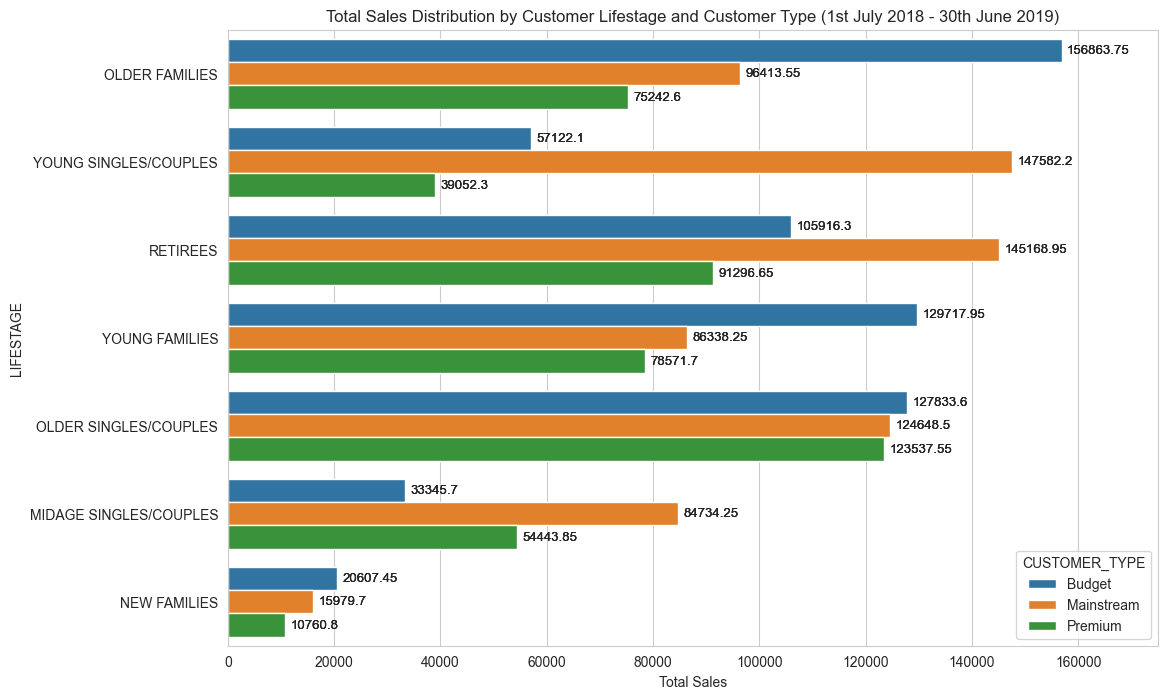

In [53]:
plt.figure(figsize=(12,8))
bar = sns.barplot(y="LIFESTAGE", x="total_sales", data=sales_by_cst, hue="CUSTOMER_TYPE")

for s in bar.containers:
    for b in bar.patches:
        width = b.get_width()
        height = b.get_height()
        x, y = b.get_xy()
        bar.annotate(str(width), (x+width+1000,y+height/2), va="center", fontsize=9.5)

plt.title("Total Sales Distribution by Customer Lifestage and Customer Type (1st July 2018 - 30th June 2019)")
plt.xlabel("Total Sales")
plt.xlim(0, 175000)
plt.show()

It is clear that most sales are coming from (1) Budget - Older families, (2) Mainstream - Young Singles/Couples, and (3) Mainstream - Retirees
   
Let's look at the number of customers overall in the segment, we'll see if these same segments have the most customers.

### Total Customers

In [54]:
tot_cst = main_df.groupby(["LIFESTAGE", "CUSTOMER_TYPE"]).agg(total_cst=("LYLTY_CARD_NBR", "nunique"))
tot_cst = tot_cst.sort_values(by="total_cst", ascending=False).reset_index()

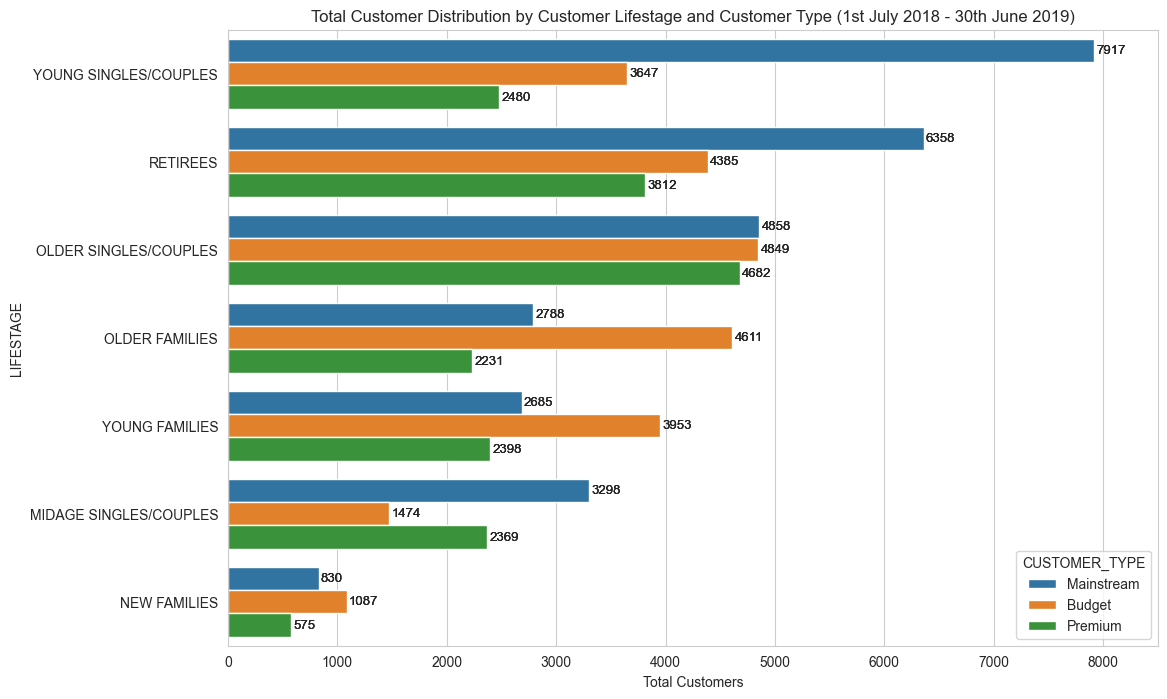

In [55]:
plt.figure(figsize=(12,8))
bar = sns.barplot(y="LIFESTAGE", x="total_cst", data=tot_cst, hue="CUSTOMER_TYPE")

for s in bar.containers:
    for b in bar.patches:
        width = b.get_width()
        height = b.get_height()
        x, y = b.get_xy()
        bar.annotate(str(int(width)), (x+width+20,y+height/2), va="center", fontsize=9.5)

plt.title("Total Customer Distribution by Customer Lifestage and Customer Type (1st July 2018 - 30th June 2019)")
plt.xlabel("Total Customers")
plt.xlim(0, 8500)
plt.show()

We can see that the number of Mainstream - Young Singles/Couples and Mainstream - Retirees are the highest, hence this number is the main driving factor to why we saw more sales for these 2 segments. However, we cannot say the same for Budget - Older families.

So, if number of Budget - Older families is not the reason why this segment has high sales, there must be other driving factor. It could be that there are more number of chips purchased per customer in this segment, driving total sales high up. So let's check if that's the case.

### Quantity purchased per Customer

In [56]:
tot_qty = main_df.groupby(["LIFESTAGE", "CUSTOMER_TYPE"]).agg(total_qty=("PROD_QTY", "sum"), total_cst=("LYLTY_CARD_NBR", "nunique"))
tot_qty["qty_per_cst"] = tot_qty["total_qty"]/tot_qty["total_cst"]
tot_qty = tot_qty.sort_values(by="qty_per_cst", ascending=False).reset_index()

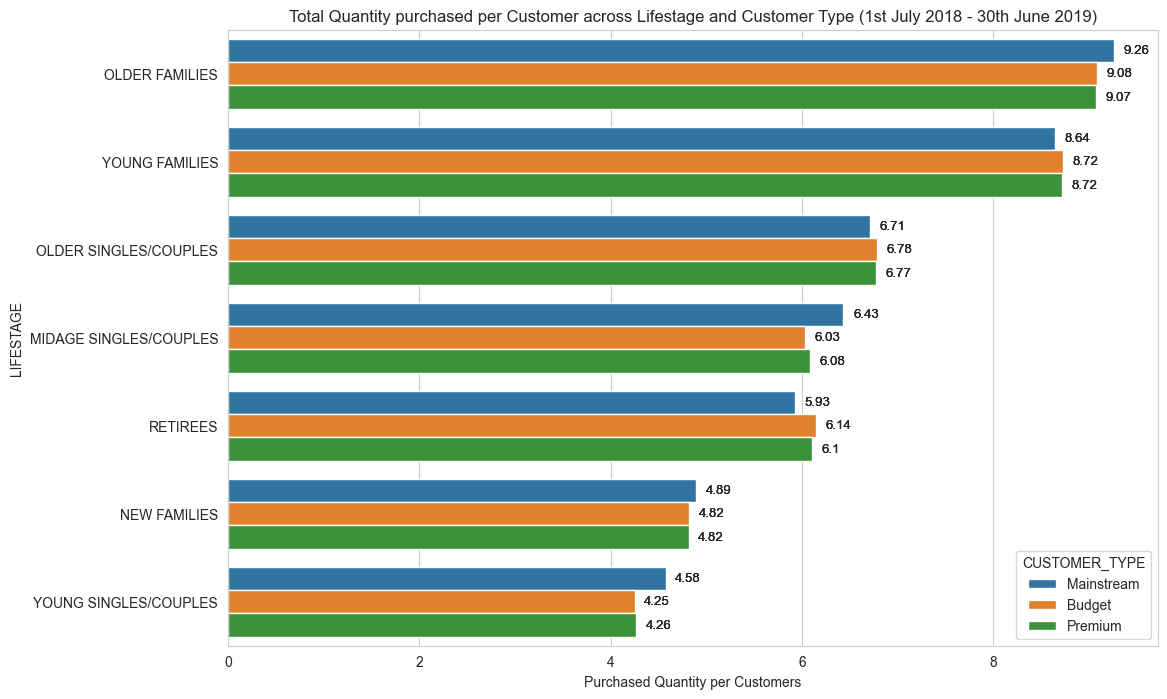

In [57]:
plt.figure(figsize=(12,8))
bar = sns.barplot(y="LIFESTAGE", x="qty_per_cst", data=tot_qty, hue="CUSTOMER_TYPE")

for s in bar.containers:
    for b in bar.patches:
        width = b.get_width()
        height = b.get_height()
        x, y = b.get_xy()
        bar.annotate(str(round(width,2)), (x+width+0.1,y+height/2), va="center", fontsize=9.5)

plt.title("Total Quantity purchased per Customer across Lifestage and Customer Type (1st July 2018 - 30th June 2019)")
plt.xlabel("Purchased Quantity per Customers")
#plt.xlim(0, 8500)
plt.show()

Older and Young families tend to buy more qyantity of chips per person.

### Average Unit Price per Segment

In [58]:
main_df["UNIT_PRC"] = main_df["TOT_SALES"]/main_df["PROD_QTY"]

In [59]:
tot_prc = main_df.groupby(["LIFESTAGE", "CUSTOMER_TYPE"]).agg(avg_prc=("UNIT_PRC", "mean"))
tot_prc = tot_prc.sort_values(by="avg_prc", ascending=False).reset_index()

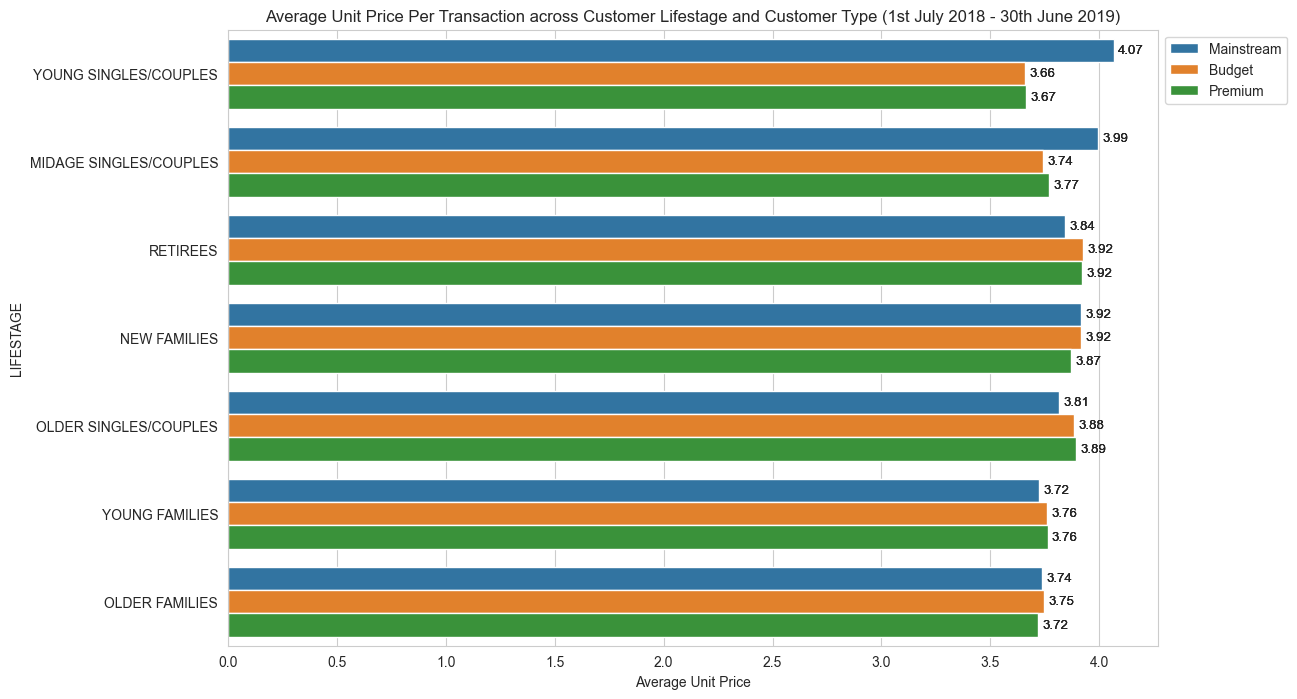

In [60]:
plt.figure(figsize=(12,8))
bar = sns.barplot(y="LIFESTAGE", x="avg_prc", data=tot_prc, hue="CUSTOMER_TYPE")

for s in bar.containers:
    for b in bar.patches:
        width = b.get_width()
        height = b.get_height()
        x, y = b.get_xy()
        bar.annotate(str(round(width,2)), (x+width+0.02,y+height/2), va="center", fontsize=9.5)

plt.title("Average Unit Price Per Transaction across Customer Lifestage and Customer Type (1st July 2018 - 30th June 2019)")
plt.xlabel("Average Unit Price")
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
#plt.xlim(0, 8500)
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

Also, the difference between the average price isn't that big, let's check if this difference is significant.

### Independent 2 sample t-test

In [61]:
# Independent t-test between mainstream vs premium/budget Midage and Young singles/couples.
# Here, group 1 will be mainstream - midage/young singles/couples
# And, group 2 will be premium/budget - midage/young singles/couples

group_1 = main_df[(main_df["CUSTOMER_TYPE"] == "Mainstream") & ((main_df["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (main_df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES"))]["UNIT_PRC"]
group_2 = main_df[(main_df["CUSTOMER_TYPE"] != "Mainstream") & ((main_df["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (main_df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES"))]["UNIT_PRC"]

t_statistic, p_value = stats.ttest_ind(group_1.values, group_2.values, equal_var=False)
print("\nIndependent two-sample t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Independent two-sample t-test:
t-statistic: 37.6243885962296
p-value: 6.967354232991982e-306


A very large t-statistic means that the two group means (average unit prices) are very far apart relative to the variability within the groups. And a tiny p-value like this means the probability of seeing such a big difference by random chance is almost zero. Hence, we can colclude that the difference in the average unit price between mainstream - midage/young singles/couples and premium/budgent - midage/young singles/couples is statistically significant.

Further, let's try to dive deeper into the customer segments with high total sales to identify deeper patterns. We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at (1) Budget - Older families, (2) Mainstream - Young Singles/Couples, and (3) Mainstream - Retirees. For instance, let's find out if they tend to buy a particular
brand of chips.

### Favoured Brand

In [62]:
bgt_old_fam_brd = main_df[(main_df["LIFESTAGE"] == "OLDER FAMILIES") & (main_df["CUSTOMER_TYPE"] == "Budget")]
mns_yng_snc_brd = main_df[(main_df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") & (main_df["CUSTOMER_TYPE"] == "Mainstream")]
mns_rtr_brd = main_df[(main_df["LIFESTAGE"] == "RETIREES") & (main_df["CUSTOMER_TYPE"] == "Mainstream")]


fb_df = pd.concat([bgt_old_fam_brd, mns_yng_snc_brd, mns_rtr_brd])
fb_df["SEGMENT"] = fb_df["CUSTOMER_TYPE"] + " - " + fb_df["LIFESTAGE"]

fb_df = fb_df.groupby(["SEGMENT", "PROD_BRAND"]).agg(count=("PROD_BRAND", "count")).reset_index()


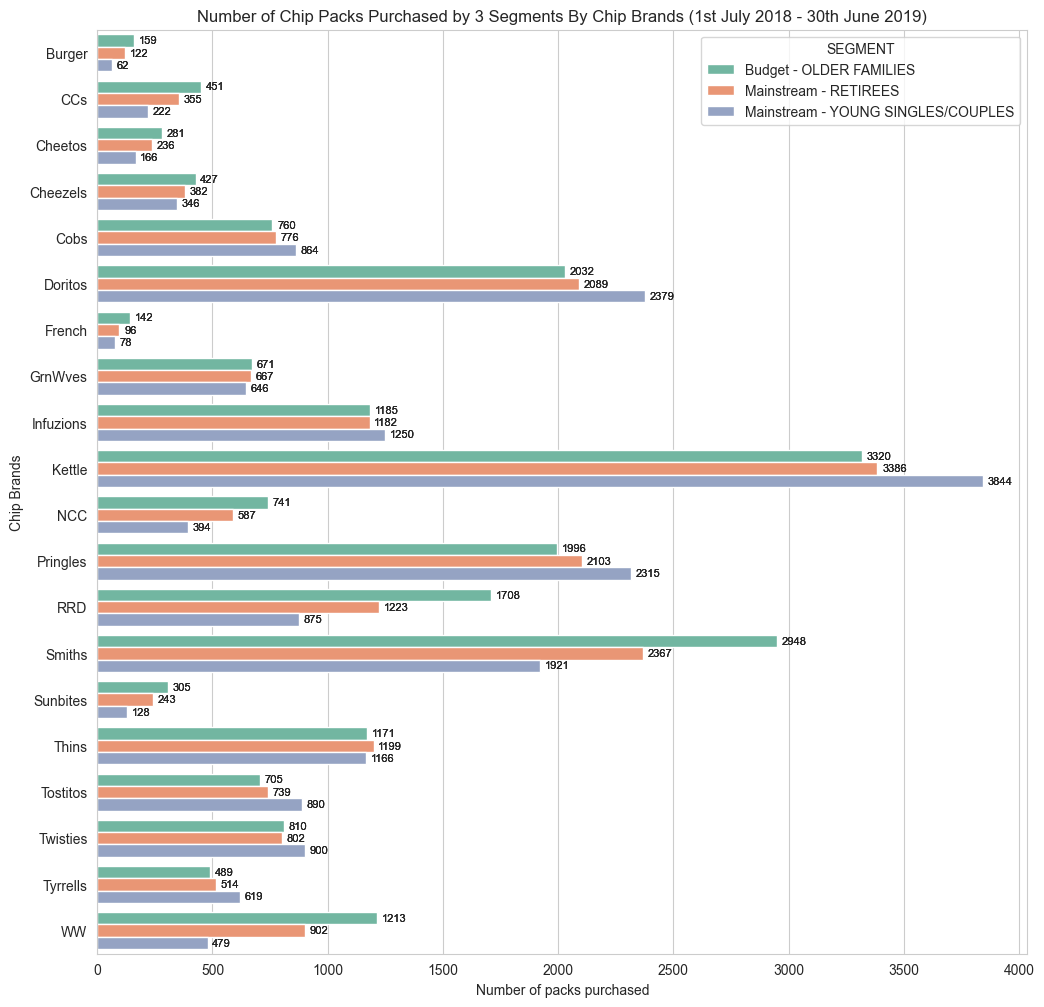

In [63]:
plt.figure(figsize=(12, 12))
bar = sns.barplot(y="PROD_BRAND", x="count", data=fb_df, hue="SEGMENT", palette="Set2", width=0.8)

for s in bar.containers:
    for b in bar.patches:
        width = b.get_width()
        height = b.get_height()
        x, y = b.get_xy()
        bar.annotate(str(int(width)), (x+width+20,y+height/2), va="center", fontsize=8)


plt.title("Number of Chip Packs Purchased by 3 Segments By Chip Brands (1st July 2018 - 30th June 2019)")
#plt.xticks(rotation = 45)
plt.ylabel("Chip Brands")
plt.xlabel("Number of packs purchased")
plt.show()

Now we know that all 3 of these segments prefer "Kettle" chip brand the most. Let's check across pack sizes.

### Favoured Size

In [64]:
fs_df = pd.concat([bgt_old_fam_brd, mns_yng_snc_brd, mns_rtr_brd])
fs_df["SEGMENT"] = fs_df["CUSTOMER_TYPE"] + " - " + fs_df["LIFESTAGE"]

fs_df = fs_df.groupby(["SEGMENT", "PROD_SIZE"]).agg(count=("PROD_SIZE", "count")).reset_index()

In [ ]:
plt.figure(figsize=(12, 12))
bar = sns.barplot(y="PROD_SIZE", x="count", data=fs_df, hue="SEGMENT", palette="Set2")

for s in bar.containers:
    for b in bar.patches:
        width = b.get_width()
        height = b.get_height()
        x, y = b.get_xy()
        bar.annotate(str(int(width)), (x+width+20,y+height/2), va="center", fontsize=8)


plt.title("Number of Chip Packs Purchased by 3 Segments By Chip Pack Size (1st July 2018 - 30th June 2019)")
plt.ylabel("Chip Pack Size in Grams")
plt.xlabel("Number of packs purchased")
plt.show()

It is clear that all these segments prefers to purchase 175g pack size.

### Sales for Brand and Size

In [ ]:
ts_df = pd.concat([bgt_old_fam_brd, mns_yng_snc_brd, mns_rtr_brd])
ts_df["SEGMENT"] = ts_df["CUSTOMER_TYPE"] + " - " + ts_df["LIFESTAGE"]

ts_df = ts_df.groupby(["PROD_BRAND", "PROD_SIZE"]).agg(total_sales=("TOT_SALES", "sum")).sort_values(by="total_sales", ascending=False).reset_index()
ts_df["BRAND_SIZE"] = ts_df["PROD_BRAND"] + " - " + ts_df["PROD_SIZE"]
ts_df

In [ ]:
plt.figure(figsize=(10, 10))
bar = sns.barplot(y="BRAND_SIZE", x="total_sales", data=ts_df)

#for i in range(len(ts_df)):
#    bar.text(i, ts_df["total_sales"][i]+0.1, str(ts_df["total_sales"][i]),
#             fontdict=dict(color="black", fontsize=6, horizontalalignment="center"))

plt.title("Total Sales for Specific Brand & Size (1st July 2018 - 30th June 2019)")
plt.xlabel("Total Sales")
plt.ylabel("Brand with Size")
plt.show()

It's clear that the top 3 segments by total sales, prefer Kettle in 175g pack.

Now that we've analyzed for customer segments. Let's look at time-based analysis using the date column.

### Timeline 

In [ ]:
main_df.head(1)

In [ ]:
date_sales = main_df.groupby("DATE").agg(total_sales=("TOT_SALES", "sum")).reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(x=date_sales["DATE"], y=date_sales["total_sales"])
plt.title("Total Sales across the timeline (1st July 2018 - 30th June 2019)")
plt.ylabel("Total Sales")
plt.xlabel("Date")
month_start = date_sales["DATE"].dt.to_period("M").dt.start_time.dt.strftime("%Y-%m-%d").drop_duplicates().to_frame()
plt.xticks(ticks=month_start["DATE"], labels= month_start["DATE"], rotation=40)
plt.show()

The total sales remain pretty stagnant through most months of the year. However, we see that sales rise just during christmas season. Let's analyze this in depth.

In [ ]:
december_sales = date_sales[(date_sales["DATE"] >= "2018-12-01") & (date_sales["DATE"] <= "2018-12-31")]
plt.figure(figsize=(15, 5))
sns.lineplot(x=december_sales["DATE"], y=december_sales["total_sales"])
plt.title("Total Sales in December 2018 (1st Dec 2018 - 31st Dec 2018)")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.xticks(ticks=december_sales["DATE"], labels=december_sales["DATE"].dt.strftime("%d"))
plt.show()

We can see that the surge in sales happen roughly 1 week before Christmas! But they're 0 on the Chritmas day due to holiday.

Let's quickly check if this behavior is observed across all the Lifestages.

In [ ]:
plt.figure(figsize=(12,6))
december_df = main_df[(main_df["DATE"] >= "2018-12-01") & (main_df["DATE"] <= "2018-12-31")]
december_seg_sales = december_df.groupby(["LIFESTAGE", "DATE"]).agg(total_sales=("TOT_SALES", "sum")).reset_index()
sns.lineplot(x="DATE", y="total_sales", data=december_seg_sales, hue="LIFESTAGE", marker="o")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.xticks(ticks=december_sales["DATE"], labels=december_sales["DATE"].dt.strftime("%d"))
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.title("Holiday season Sales across Customer Lifestage (1st Dec 2018 - 31st Dec 2018)")
plt.show()

This shows that not all Lifestages increase their purchasing during christmas. The New families sales remain roughly constant even during the christmas season. Maybe due to they're focusing on savings as the family is just new.

We have conducted a pretty good analysis of the customer segments and their behavior. Let's consolidate all these observations into insights.

## Observations & Summary

### Customer Segmentation:

- Customers are categorized by LIFESTAGE and CUSTOMER_TYPE.

- The LIFESTAGE distribution is skewed toward certain groups (e.g., RETIREES and YOUNG SINGLES/COUPLES).

- The CUSTOMER_TYPE column (formerly misleadingly named PREMIUM_CUSTOMER) shows that not all customers are premium; a substantial portion are mainstream and budget shoppers.

### Transaction Data:

- The DATE field needed fixing (converted properly from Excel's integer format to datetime).

- The dataset shows multiple repeat purchases over time, suggesting regular customer engagement.

### Product Data (PROD_NAME):

- 114 unique product names were found, but many names included weights like "250g", "500G", making analysis messy.

- Identified and cleaned product names by removing weight-related text.

- Product standardization improved clarity when grouping or aggregating sales by product brand and sizes.
  
- KETTLE is the also the highest-selling brand during the entire year, but the 175 gramme package size is the highest-selling package size, on average

### Sales Behavior:

- There is clear seasonality in sales, with peaks during christmas season.

- There are strong signals that certain product sizes (like 175g packs) are consistently popular across multiple customer segments.

- Some products (after standardization) show dominance in terms of both frequency and sales volume.

### Data Quality Checks:

- No missing values were found in the datasets — clean data!

- Corrected and clarified column names where they were confusing (e.g., PREMIUM_CUSTOMER → CUSTOMER_TYPE).

## Insights

- Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream retirees shoppers.
- We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers.
- Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
- We should focus inventory planning, in-store displays, and promotions around 175g packets, as well as the KETTLE branded chips, as they are consistently the top-selling size and brand across customer groups.
- Proactively boost marketing campaigns and ensure surplus inventory 1-2 weeks before anticipated high-sales periods identified through sales seasonality (during Christmas).